# **Decision Trees**

## **Introduction**

### **Methods**

In this section of my project, I am focusing on the application of machine learning to predict the FDA medical device approval categories for companies, based on their financial data. My dataset includes public company financials from balance sheets, and my goal is to predict the 'advisory_committee_description' category for FDA approvals.

I will use Python and the scikit-learn library for this task. My main tools will be decision trees and Random Forest algorithms. Decision trees are useful for breaking down a dataset into smaller subsets while at the same time developing an associated decision tree. The end result is a tree with decision nodes and leaf nodes, which is easy to understand and interpret.

To enhance the model’s accuracy and handle the complexity of financial data, I will also use the Random Forest algorithm. This method works by building numerous decision trees and merging them together to get a more accurate and stable prediction. It's particularly good for dealing with large datasets and can reduce the risk of overfitting.

Considering the potential imbalance in the dataset, I will implement the SMOTE technique from scikit-learn's imbalanced-learn package. This will help balance the dataset by increasing the number of instances from the under-represented categories in the data.

Finally, to ensure the best model performance, I will utilize GridSearchCV for hyperparameter tuning. This process involves trying out different combinations of parameters to find the most effective ones for our model.

This project aims to provide insights into how a company’s financial health might influence its classification in the FDA's medical device approval process. I hypothesize that companies with strong R&D budgets, top line revenue, and strong profitablity will tend to more likely apply for devices in specific advisory committee categories (more profitable industries/device spaces). I also hypothesize that companies with weaker financials will tend to apply for devices in other advisory committee categories (less profitable devices).

## **Data Selection**

### **Loading Data**

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../dimensionality-reduction/outputs/model_2.csv')

In [193]:
data

,device_name,SEC_name,state,CIK,financial_year,advisory_committee_description,clearance_type,CostOfGoodsAndServicesSold,GrossProfit,OperatingExpenses,ResearchAndDevelopmentExpense,SellingGeneralAndAdministrativeExpense,OperatingIncomeLoss,NetIncomeLoss,EarningsPerShareBasic,ConsolidatedRevenue
0,CONFIRM BIOACTIVE,"GLOBUS MEDICAL, INC.",PA,1237831,2014.0,Orthopedic,Traditional,-0.321605,-0.010735,-0.257475,-0.487063,-0.136833,-0.013943,-0.220467,0.109700,-0.141955
1,SILC FIXATION SYSTEM,"GLOBUS MEDICAL, INC.",PA,1237831,2014.0,Orthopedic,Traditional,-0.321605,-0.010735,-0.257475,-0.487063,-0.136833,-0.013943,-0.220467,0.109700,-0.141955
2,REVERE STABILIZATION SYSTEM,"GLOBUS MEDICAL, INC.",PA,1237831,2014.0,Orthopedic,Traditional,-0.321605,-0.010735,-0.257475,-0.487063,-0.136833,-0.013943,-0.220467,0.109700,-0.141955
3,SUSTAIN AND SUSTAIN RADIOLUCENT SPACERS,"GLOBUS MEDICAL, INC.",PA,1237831,2013.0,Orthopedic,Traditional,-0.358591,-0.045039,-0.257475,-0.550780,-0.149660,-0.098954,-0.329438,0.098585,-0.176418
4,COALITION SPACER,"GLOBUS MEDICAL, INC.",PA,1237831,2013.0,Orthopedic,Traditional,-0.358591,-0.045039,-0.257475,-0.550780,-0.149660,-0.098954,-0.329438,0.098585,-0.176418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,Palladium High Flow Therapy System,"Vapotherm, Inc.",NH,1253176,2019.0,Anesthesiology,Traditional,-0.848702,-1.164595,-0.888925,-0.921992,-0.680315,-0.494332,-0.507841,-0.486200,-1.039396
520,"Indigo System Aspiration Catheter 12, Indigo A...","Penumbra, Inc",CA,1321732,2020.0,Cardiovascular,Traditional,-0.124670,-0.001388,-0.004456,0.039651,0.054045,-0.500575,-0.533133,0.138180,-0.076593
521,BENCHMARK BMX81 Access System,"Penumbra, Inc",CA,1321732,2022.0,Cardiovascular,Traditional,0.062378,0.146620,0.172622,-0.023774,0.255965,-0.591086,-0.860437,-0.004221,0.085430
522,Cerner CareAware Event Management,CERNER CORPORATION,MO,804753,2015.0,Cardiovascular,Traditional,0.388393,0.930281,1.060938,0.963724,0.691325,0.774006,0.632532,0.150683,0.733712


In [194]:
data["advisory_committee_description"].value_counts()

advisory_committee_description
Cardiovascular               82
Gastroenterology, Urology    80
Microbiology                 78
General Hospital             66
General, Plastic Surgery     64
Orthopedic                   38
Radiology                    25
Obstetrics/Gynecology        15
Clinical Chemistry           14
Neurology                    13
Anesthesiology                8
Unknown                       8
Ear, Nose, Throat             8
Immunology                    7
Dental                        7
Hematology                    4
Physical Medicine             4
Clinical Toxicology           2
Pathology                     1
Name: count, dtype: int64

### **Selecting Data**

In [195]:
# Calculate value counts for the advisory_committee_description column
value_counts = data['advisory_committee_description'].value_counts()

# Filter out the values where counts are 10 or more
values_to_keep = value_counts[value_counts >= 10].index

# Keep rows in the DataFrame where advisory_committee_description is in values_to_keep
filtered_data = data[data['advisory_committee_description'].isin(values_to_keep)]


In [196]:
from sklearn.model_selection import train_test_split

# Selecting financial columns and the target variable
financial_columns = [
    'CostOfGoodsAndServicesSold', 'GrossProfit', 'OperatingExpenses',
    'ResearchAndDevelopmentExpense', 'SellingGeneralAndAdministrativeExpense',
    'OperatingIncomeLoss', 'NetIncomeLoss', 'EarningsPerShareBasic',
    'ConsolidatedRevenue'
]
target_column = 'advisory_committee_description'

# Creating a new DataFrame with only the relevant columns
data_selected = filtered_data[financial_columns + [target_column]].dropna()

# Check for missing values
missing_values = data_selected.isnull().sum()

# Splitting the data into training and testing sets
X = data_selected[financial_columns]
y = data_selected[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

missing_values, X_train.shape, X_test.shape

(CostOfGoodsAndServicesSold                0
 GrossProfit                               0
 OperatingExpenses                         0
 ResearchAndDevelopmentExpense             0
 SellingGeneralAndAdministrativeExpense    0
 OperatingIncomeLoss                       0
 NetIncomeLoss                             0
 EarningsPerShareBasic                     0
 ConsolidatedRevenue                       0
 advisory_committee_description            0
 dtype: int64,
 (331, 9),
 (142, 9))

## **Model Implementation**

### **Random Classifier**

In [197]:
import random
from collections import Counter
from sklearn.metrics import accuracy_score
#from sklearn.metrics import precision_recall_fscore_support

def generate_label_data(class_labels, weights,N=10000):
    #e.g. class_labels=[0,1]  weights=[0.2,0.8] (should sum to one)

    y=random.choices(class_labels, weights = weights, k = N)
    print("-----GENERATING DATA-----")
    print("unique entries:",Counter(y).keys())  
    print("count of labels:",Counter(y).values()) # counts the elements' frequency
    print("probability of labels:",np.fromiter(Counter(y).values(), dtype=float)/len(y)) # counts the elements' frequency
    return y

#TEST

y = y.astype('category')
cats= y.cat.categories
codes = y.cat.codes

gen = generate_label_data(list(range(len(cats))), y.value_counts(normalize=True).values, y.count())

-----GENERATING DATA-----
unique entries: dict_keys([6, 5, 4, 0, 3, 1, 9, 2, 8, 7])
count of labels: dict_values([20, 46, 57, 81, 79, 73, 11, 73, 23, 10])
probability of labels: [0.0422833  0.09725159 0.1205074  0.17124736 0.16701903 0.15433404
 0.02325581 0.15433404 0.04862579 0.02114165]


In [198]:
## RANDOM CLASSIFIER 
from sklearn.metrics import classification_report

def random_classifier(y_data):
    ypred=[];
    max_label=np.max(y_data); #print(max_label)
    for i in range(0,len(y_data)):
        ypred.append(int(np.floor((max_label+1)*np.random.uniform(0,1))))

    print("-----RANDOM CLASSIFIER-----")
    #print("count of prediction:",Counter(ypred).values()) # counts the elements' frequency
    #print("probability of prediction:",np.fromiter(Counter(ypred).values(), dtype=float)/len(y_data)) # counts the elements' frequency
    #print("accuracy",accuracy_score(y_data, ypred))
    #print("percision, recall, fscore,",precision_recall_fscore_support(y_data, ypred))

    return accuracy_score(y_data, ypred), classification_report(y_data, ypred)

acc, mat = random_classifier(gen)

print("Accuracy:", round(100*acc, 3), "%")
print(mat)

-----RANDOM CLASSIFIER-----
Accuracy: 11.205 %
              precision    recall  f1-score   support

           0       0.24      0.15      0.18        81
           1       0.19      0.18      0.19        73
           2       0.20      0.12      0.15        73
           3       0.17      0.11      0.14        79
           4       0.13      0.11      0.12        57
           5       0.04      0.04      0.04        46
           6       0.03      0.05      0.04        20
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        23
           9       0.02      0.09      0.04        11

    accuracy                           0.11       473
   macro avg       0.10      0.09      0.09       473
weighted avg       0.15      0.11      0.13       473



### **Basic Decision Tree Classifier**

#### **Hyperparameter Tuning**

In [199]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Hyperparameter tuning via grid search
parameters = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), parameters, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s


{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

#### **Running Optimized Model**

In [200]:
# Implementing DT with optimal hyperparameters
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=best_params['max_depth'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       min_samples_split=best_params['min_samples_split'])
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)
dt_report = classification_report(y_test, y_pred_dt)

#### **Results**

                           precision    recall  f1-score   support

           Cardiovascular       0.52      0.70      0.60        20
       Clinical Chemistry       1.00      0.38      0.55         8
Gastroenterology, Urology       0.69      0.50      0.58        18
         General Hospital       0.55      0.63      0.59        19
 General, Plastic Surgery       0.67      0.60      0.63        20
             Microbiology       0.86      0.83      0.85        30
                Neurology       0.43      0.75      0.55         4
    Obstetrics/Gynecology       0.80      0.80      0.80         5
               Orthopedic       0.54      0.64      0.58        11
                Radiology       1.00      0.71      0.83         7

                 accuracy                           0.66       142
                macro avg       0.71      0.65      0.65       142
             weighted avg       0.70      0.66      0.66       142



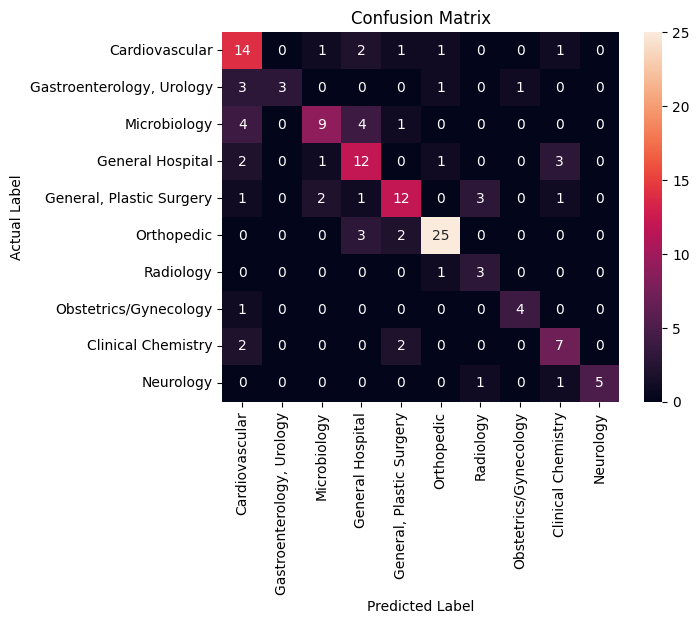

In [201]:
from sklearn.metrics import confusion_matrix

print(dt_report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', xticklabels= values_to_keep, yticklabels=values_to_keep)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### **Basic Random Forest Classifier**

#### **Hyperparameter Tuning**

In [202]:
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter tuning 
parameters = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), parameters, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

#### **Running Optimized Model**

In [203]:
# Implementing RF
rf_classifier = RandomForestClassifier(random_state=42, max_depth=best_params['max_depth'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       min_samples_split=best_params['min_samples_split'],
                                       n_estimators=best_params['n_estimators'])
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
rf_report = classification_report(y_test, y_pred_rf)

#### **Results**

                           precision    recall  f1-score   support

           Cardiovascular       0.57      0.65      0.60        20
       Clinical Chemistry       0.75      0.38      0.50         8
Gastroenterology, Urology       0.64      0.50      0.56        18
         General Hospital       0.60      0.79      0.68        19
 General, Plastic Surgery       0.62      0.65      0.63        20
             Microbiology       0.83      0.80      0.81        30
                Neurology       0.60      0.75      0.67         4
    Obstetrics/Gynecology       0.80      0.80      0.80         5
               Orthopedic       0.70      0.64      0.67        11
                Radiology       1.00      0.86      0.92         7

                 accuracy                           0.68       142
                macro avg       0.71      0.68      0.69       142
             weighted avg       0.69      0.68      0.68       142



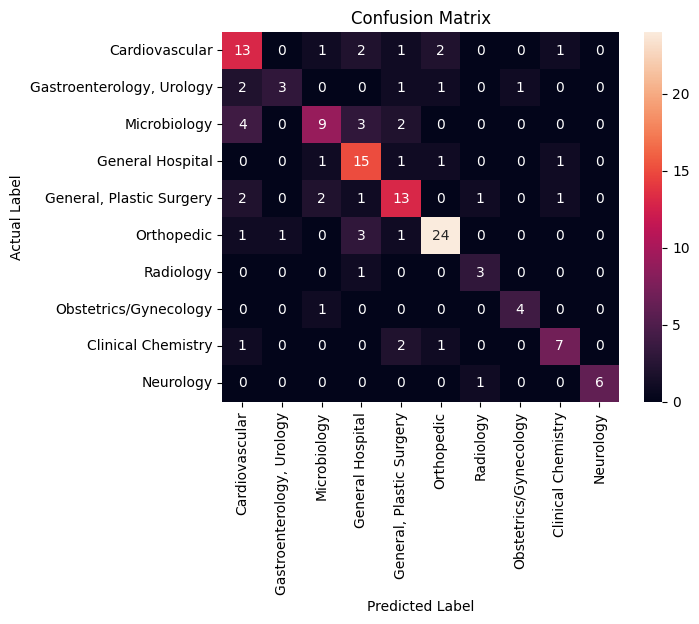

In [204]:
# Results
print(rf_report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', xticklabels= values_to_keep, yticklabels=values_to_keep)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

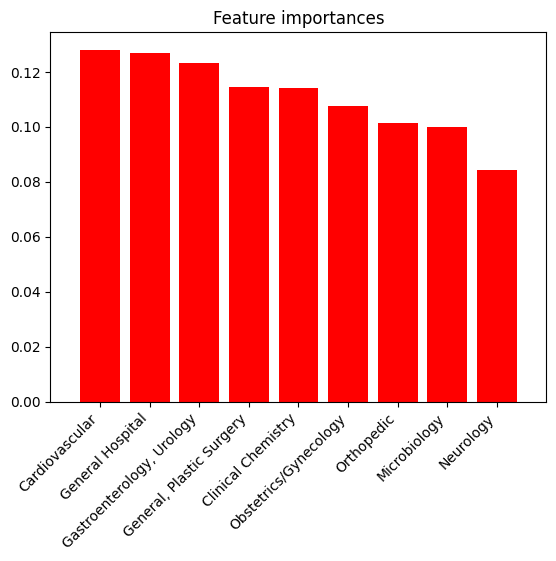

[0.12802673 0.11434681 0.12342517 0.12681948 0.1144231  0.09982852
 0.08425599 0.10761805 0.10125615]


In [205]:
feature_importances = rf_classifier.feature_importances_
indices = np.argsort(feature_importances)[::-1]
feature_names_sorted = [y.cat.categories[i] for i in indices]


plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names_sorted, rotation=45, ha= 'right')
plt.xlim([-1, X_train.shape[1]])
plt.show()

print(feature_importances)

### **Decision Tree with SMOTE**

#### **Applying SMOTE**

In [206]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE for class rebalancing
smote = SMOTE(k_neighbors= 5, random_state= 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#### **Hyperparameter Tuning**

In [207]:
# Hyperparameter tuning via grid search
parameters = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), parameters, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_smote, y_train_smote)

# Best hyperparameters
best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s


{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

#### **Running Optimized Model**

In [208]:
# Implementing DT with optimal hyperparameters
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=best_params['max_depth'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       min_samples_split=best_params['min_samples_split'])
dt_classifier.fit(X_train_smote, y_train_smote)

y_pred_dt = dt_classifier.predict(X_test)
dt_report = classification_report(y_test, y_pred_dt)


#### **Results**

In [209]:
# Viewing results
print(dt_report)

                           precision    recall  f1-score   support

           Cardiovascular       0.62      0.65      0.63        20
       Clinical Chemistry       1.00      0.38      0.55         8
Gastroenterology, Urology       0.85      0.61      0.71        18
         General Hospital       0.60      0.79      0.68        19
 General, Plastic Surgery       0.68      0.65      0.67        20
             Microbiology       0.89      0.83      0.86        30
                Neurology       0.33      0.75      0.46         4
    Obstetrics/Gynecology       0.71      1.00      0.83         5
               Orthopedic       0.70      0.64      0.67        11
                Radiology       0.86      0.86      0.86         7

                 accuracy                           0.71       142
                macro avg       0.72      0.72      0.69       142
             weighted avg       0.75      0.71      0.71       142



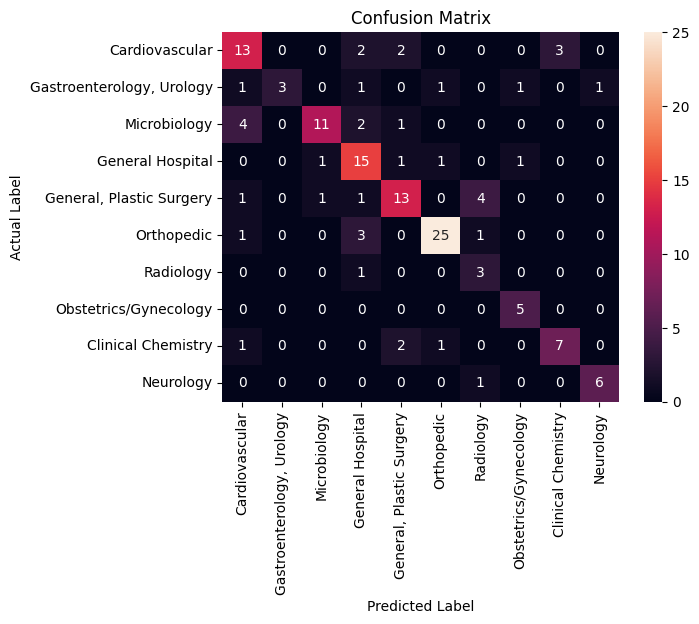

In [210]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', xticklabels= values_to_keep, yticklabels=values_to_keep)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

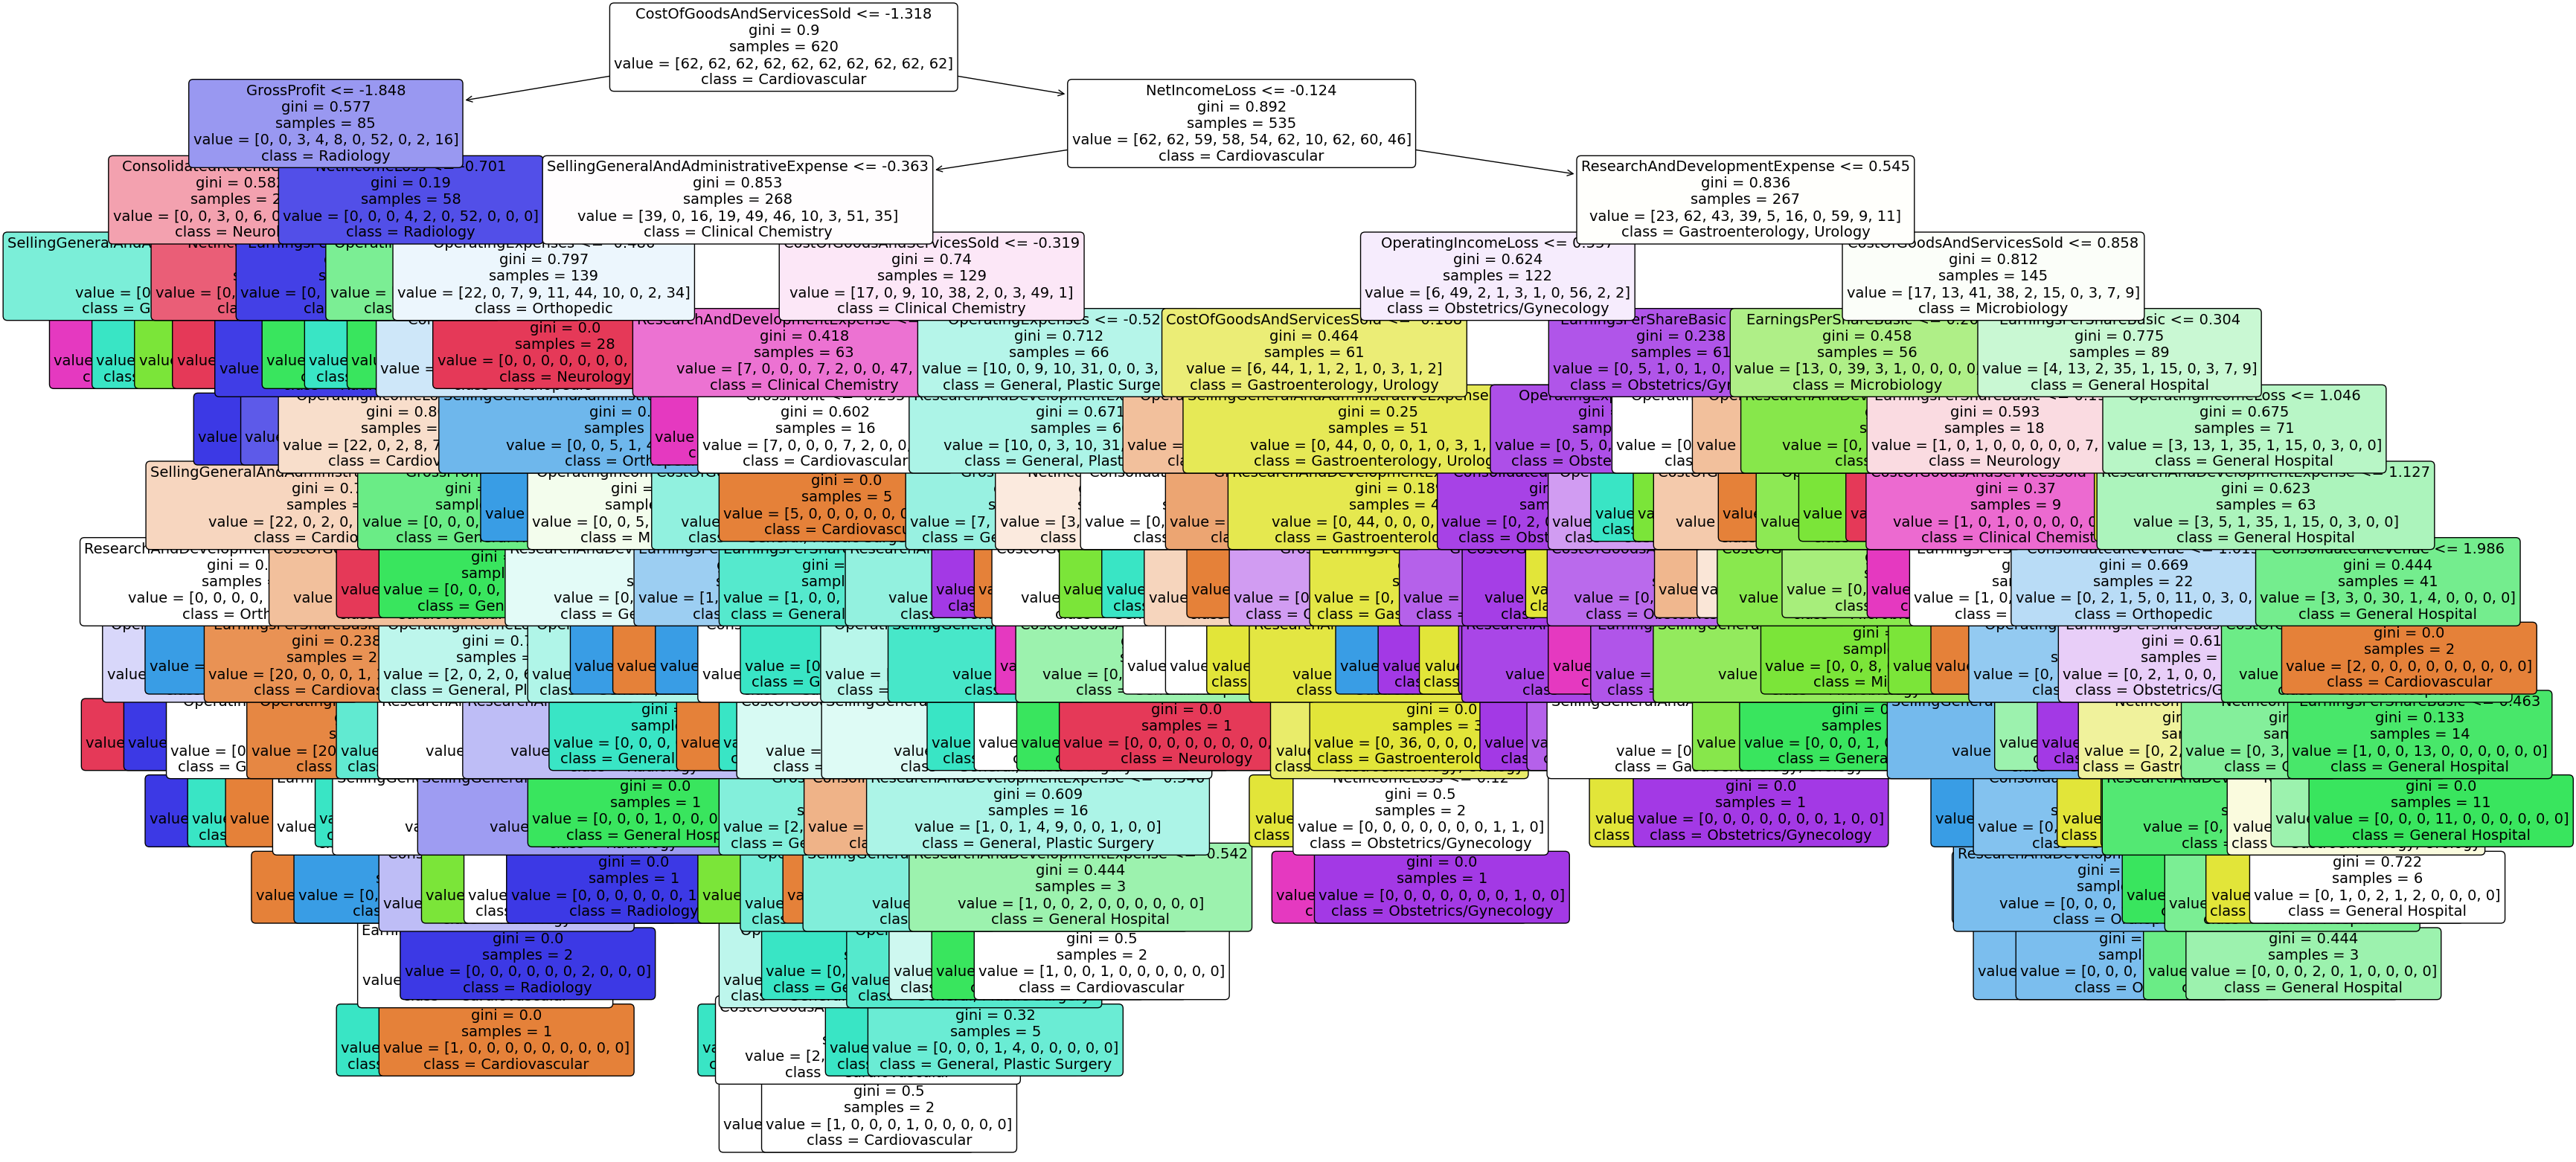

In [211]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(40, 20))
plot_tree(dt_classifier, feature_names=financial_columns, class_names= values_to_keep.values.tolist(), filled=True, rounded=True, fontsize=14)
plt.show()

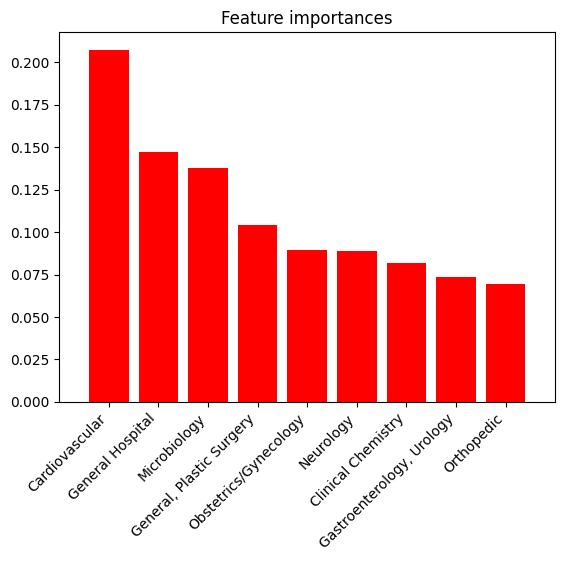

[0.20737934 0.08197713 0.07380138 0.14740718 0.10409301 0.13775414
 0.08887195 0.08923596 0.06947991]


In [212]:
feature_importances = dt_classifier.feature_importances_
indices = np.argsort(feature_importances)[::-1]
feature_names_sorted = [y.cat.categories[i] for i in indices]


plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names_sorted, rotation=45, ha= 'right')
plt.xlim([-1, X_train.shape[1]])
plt.show()

print(feature_importances)

### **Random Forest with SMOTE**

#### **Applying SMOTE**

In [213]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE for class rebalancing
smote = SMOTE(k_neighbors= 3, random_state= 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#### **Hyperparameter Tuning**

In [214]:
# Hyperparameter tuning 
parameters = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), parameters, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_smote, y_train_smote)

# Best hyperparameters
best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

#### **Running Optimized Model**

In [215]:
# Implementing RF
rf_classifier = RandomForestClassifier(random_state=42, max_depth=best_params['max_depth'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       min_samples_split=best_params['min_samples_split'],
                                       n_estimators=best_params['n_estimators'])
rf_classifier.fit(X_train_smote, y_train_smote)

y_pred_rf = rf_classifier.predict(X_test)
rf_report = classification_report(y_test, y_pred_rf)

#### **Results**

In [216]:
# Viewing results
print(rf_report)

                           precision    recall  f1-score   support

           Cardiovascular       0.57      0.65      0.60        20
       Clinical Chemistry       1.00      0.50      0.67         8
Gastroenterology, Urology       0.90      0.50      0.64        18
         General Hospital       0.56      0.79      0.65        19
 General, Plastic Surgery       0.67      0.50      0.57        20
             Microbiology       0.82      0.77      0.79        30
                Neurology       0.38      0.75      0.50         4
    Obstetrics/Gynecology       0.56      1.00      0.71         5
               Orthopedic       0.58      0.64      0.61        11
                Radiology       1.00      0.86      0.92         7

                 accuracy                           0.67       142
                macro avg       0.70      0.69      0.67       142
             weighted avg       0.72      0.67      0.67       142



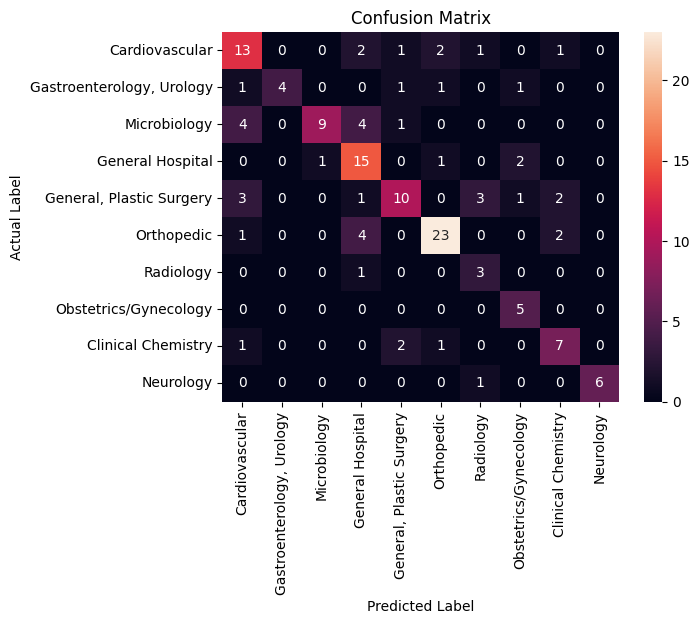

In [217]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', xticklabels= values_to_keep, yticklabels=values_to_keep)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

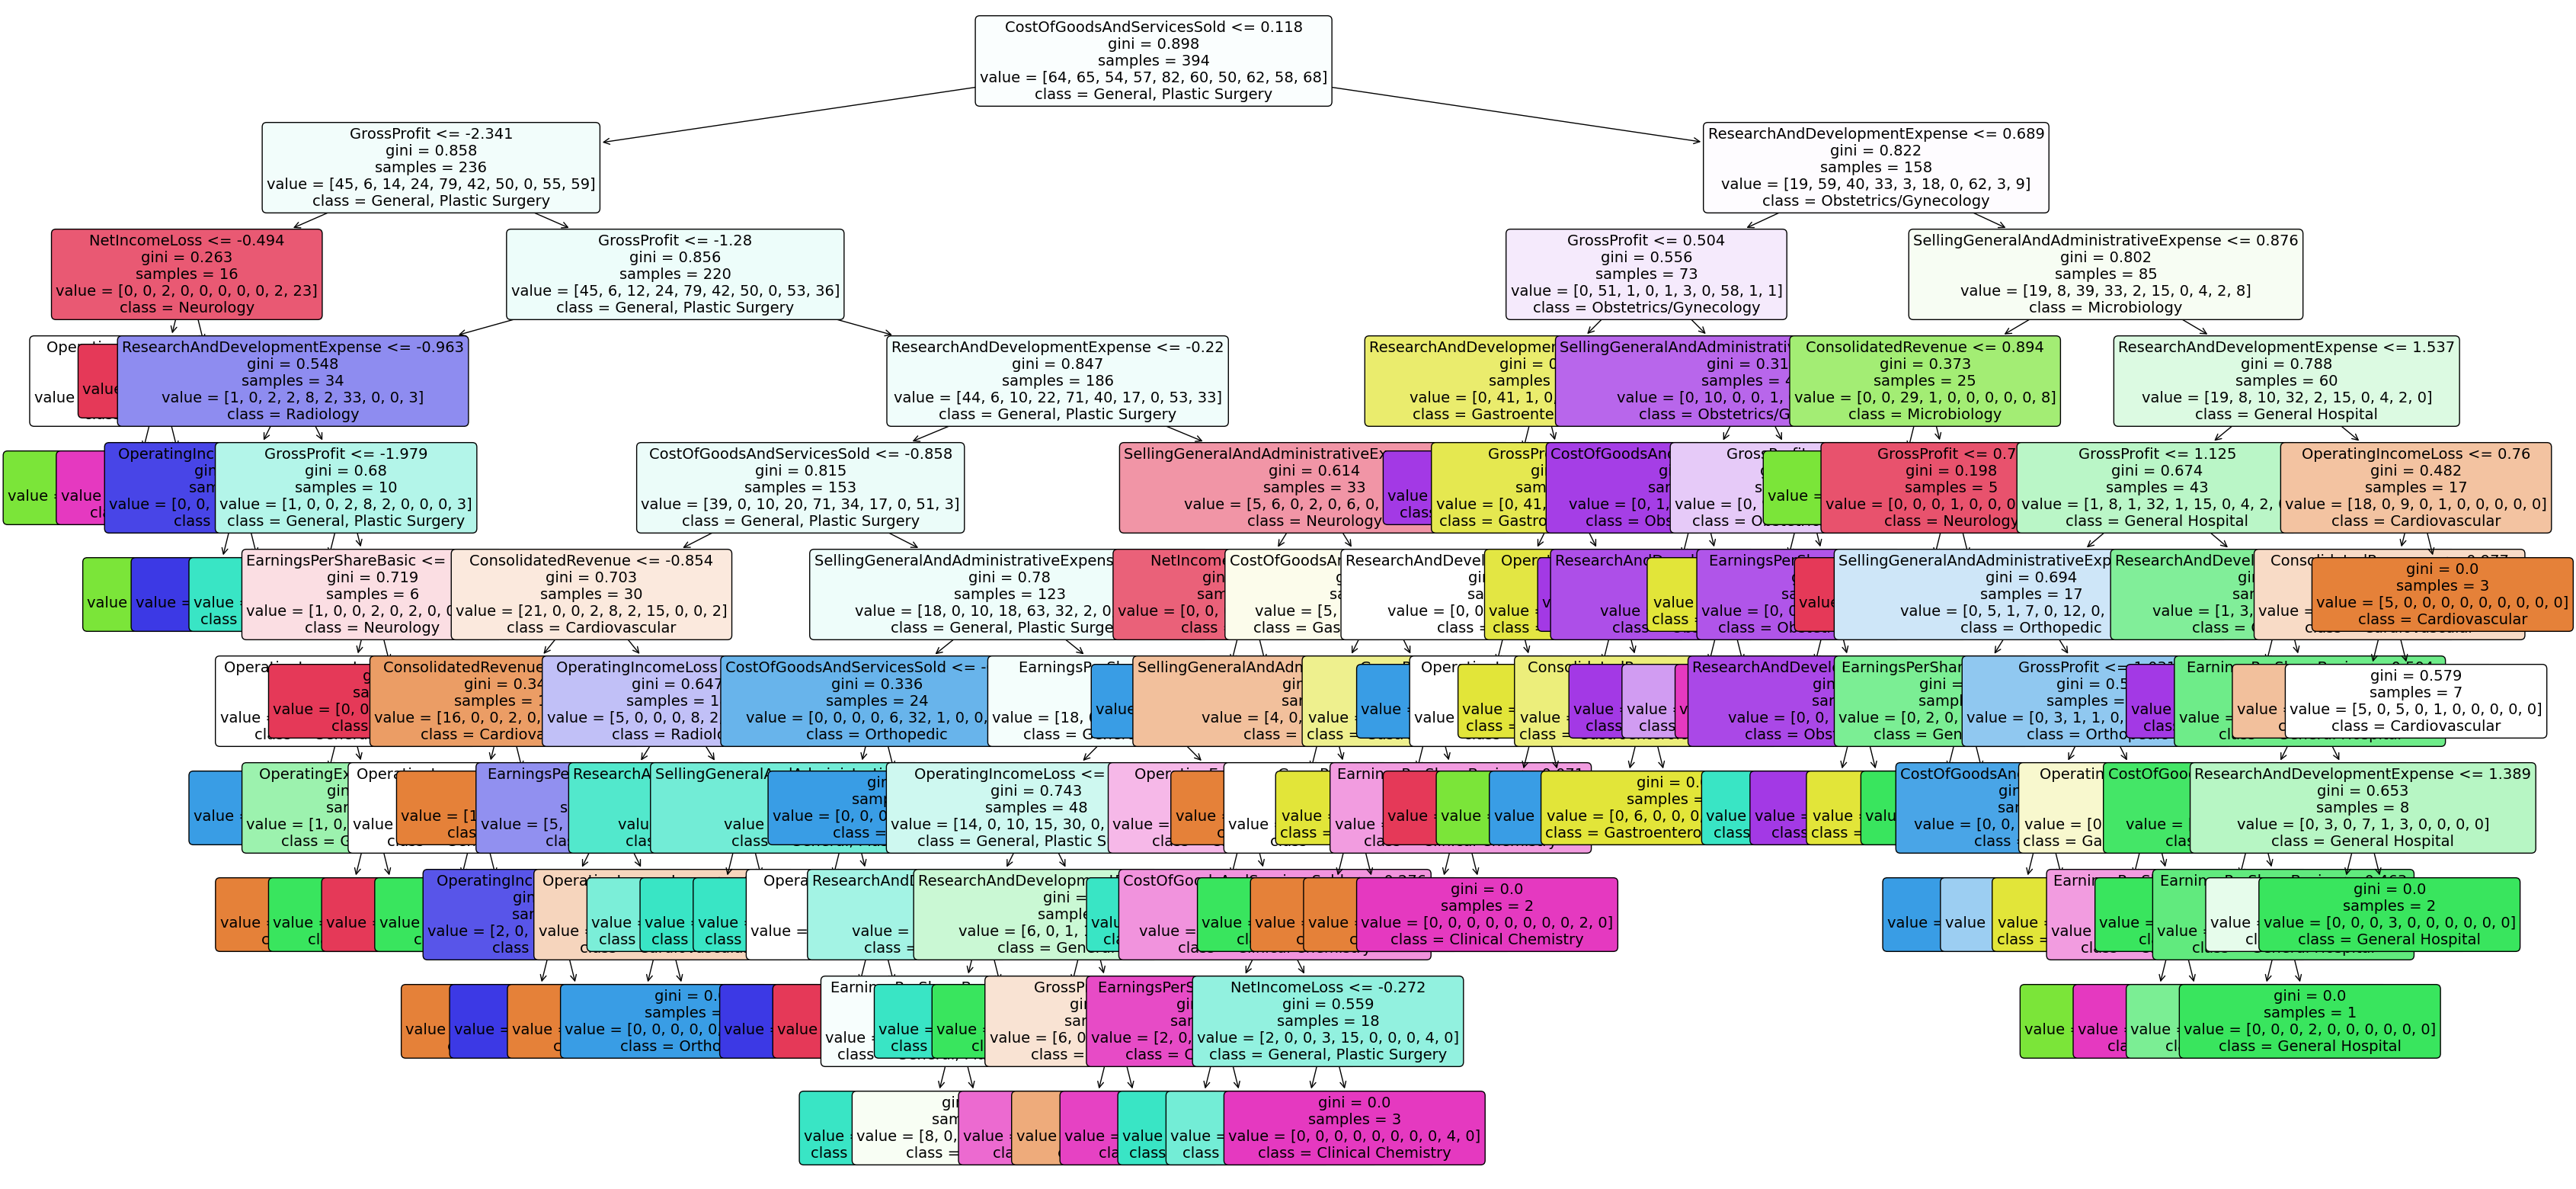

In [218]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(40, 20))
plot_tree(rf_classifier.estimators_[0], feature_names=financial_columns, class_names= values_to_keep.values.tolist(), filled=True, rounded=True, fontsize=14);

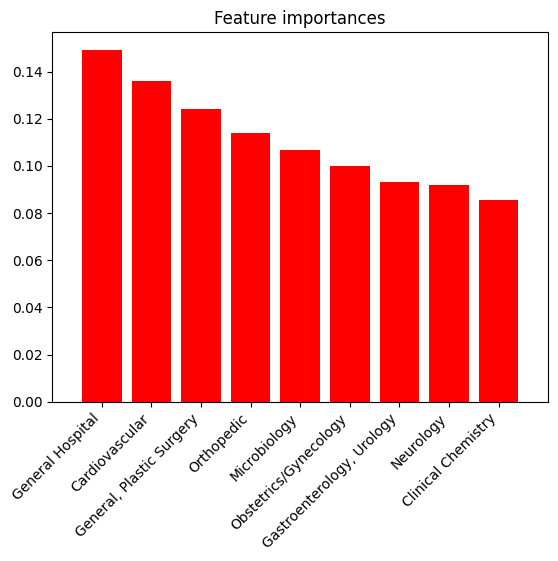

In [219]:
feature_importances = rf_classifier.feature_importances_
indices = np.argsort(feature_importances)[::-1]
feature_names_sorted = [y.cat.categories[i] for i in indices]


plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names_sorted, rotation=45, ha= 'right')
plt.xlim([-1, X_train.shape[1]])
plt.show()

## **Discussion and Conclusion**

### **Discussion of Results**

**Random Classifier**
The random classifier served as a baseline with an accuracy of only 11.205%. This performance was expectedly low, highlighting the complexity of predicting FDA approval categories based purely on financial data. The model's inability to effectively distinguish between the different classes underscores the need for more sophisticated and tailored machine learning approaches.

**Basic Decision Tree Classifier**
Moving to a basic decision tree classifier, the accuracy improved significantly to 66%. This model showed particular strengths in the 'Clinical Chemistry' and 'Microbiology' categories, with high precision scores. However, it struggled in categories like 'Neurology' and 'General Hospital', indicating possible limitations in the decision tree's ability to handle complex or less distinct categorizations. Overall, this model demonstrated a reasonable balance between precision and recall, suggesting its adequacy in handling the dataset, albeit with room for improvement.

**Basic Random Forest Classifie:**
The basic random forest classifier, an ensemble approach, further improved the accuracy to 68%. Notably, it maintained high precision in categories like 'Radiology' and 'Clinical Chemistry', but its recall in some categories like 'Clinical Chemistry' was relatively lower. This improvement over the decision tree suggests that the ensemble method is more adept at managing the dataset's complexity and variance.

**Decision Tree with SMOTE**
Implementing SMOTE with the decision tree model increased the accuracy to 71%. This approach notably enhanced the model's performance in minority classes, such as 'Obstetrics/Gynecology' and 'Neurology', which saw significant improvements in precision and recall. However, there was a slight decrease in performance for 'Clinical Chemistry'. The use of SMOTE highlighted its efficacy in balancing class representation, leading to more accurate predictions for under-represented categories.

**Random Forest with SMOTE**
Lastly, the random forest model with SMOTE achieved an accuracy similar to its basic counterpart (67%). This model showed consistency with high precision in 'Radiology' and 'Clinical Chemistry' and noticeable improvements in the recall for 'Neurology' and 'Obstetrics/Gynecology'. However, it didn’t significantly outperform the basic random forest model, suggesting that while SMOTE improved minority class prediction, it did not drastically change the overall model performance.

The Random Forest models, both basic and SMOTE-enhanced, are more consistent and balanced across categories than the decision trees. SMOTE helps in handling minority classes better, but it doesn't magically fix everything. While overall accuracy of the non-random classifier models are roughly similar, the Random Forest with SMOTE is most robust and balanced in terms of accuracy, F-score, and recall, making it the best model.

### **Conclusion:**

When I analyze the results from the machine learning models, it's evident that while I can classify biomedical companies into FDA approval categories based on their financials, this doesn't clarify how their financial health drives their research areas. The consistency in categories like 'Radiology' and 'Clinical Chemistry' suggests financial stability or profitability. In contrast, the variability in categories like 'Neurology' indicates financial unpredictability in these areas.

The decision tree models were effective for classification but didn't provide insights into the financial strategies. They reveal which category a company might fall into, but not why their financial decisions lead them there. For example, heavy investment in a certain area might result in more products under that category, but whether this is due to or results in better financial health isn't something I can determine from this data.

What's lacking in my analysis is an in-depth financial examination. I need to integrate more detailed financial metrics and consider models that handle continuous variables, like regression analysis, which could offer deeper insights.

So, while my models have yielded some classifications, they're not sufficient for understanding the financial strategies of these companies. The link between financial health and FDA category involvement is there, but the specifics of this relationship remain unclear. My future research should aim to bridge this gap, possibly combining financial analysis with more advanced machine learning methods for a more comprehensive understanding.

